# AUTHOR:- UPRE VINOD

# TASK2:- Prediction Using Unsupervised ML(Clustering)

# The Sparks Foundation DSBA(DataScience and Business Analytics) GRIPAPR21

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.shape

(150, 4)

In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

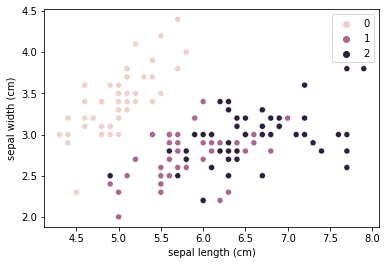

In [6]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',data=df,hue=iris.target)

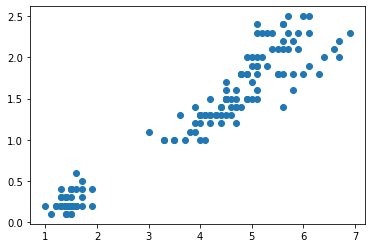

In [8]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

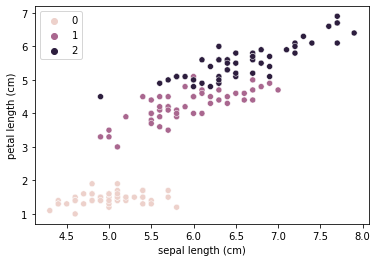

In [9]:
sns.scatterplot(x='sepal length (cm)',y='petal length (cm)',data=df,hue=iris.target)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

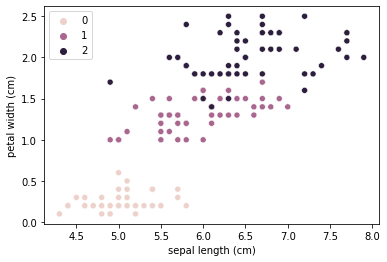

In [10]:
sns.scatterplot(x='sepal length (cm)',y='petal width (cm)',data=df,hue=iris.target)

<AxesSubplot:xlabel='sepal width (cm)', ylabel='petal width (cm)'>

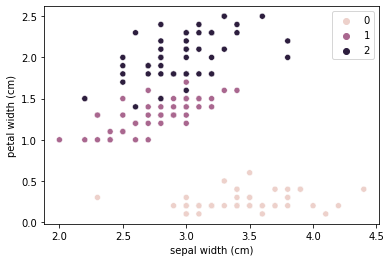

In [11]:
sns.scatterplot(x='sepal width (cm)',y='petal width (cm)',data=df,hue=iris.target)

<AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>

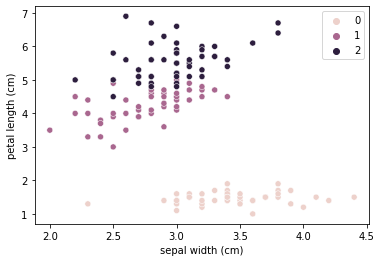

In [12]:
sns.scatterplot(x='sepal width (cm)',y='petal length (cm)',data=df,hue=iris.target)

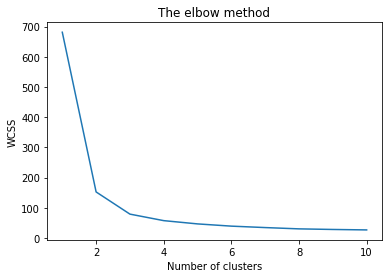

In [13]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [ ]:
# You can clearly see why it is called 'The elbow method' from the above graph,
# the optimum clusters is where the elbow occurs. 
# This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

# From this we choose the number of clusters as ** '3**'.

In [14]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df[['sepal length (cm)','petal width (cm)']])
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0])

In [18]:
km.cluster_centers_   ## these are the centroids

array([[5.89259259, 1.46296296],
       [5.00555556, 0.3037037 ],
       [6.85714286, 2.01190476]])

In [15]:
df['cluster'] = clusters

Text(0, 0.5, 'petal width (cm)')

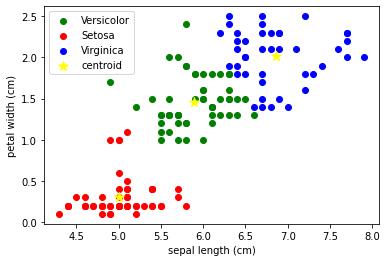

In [22]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['sepal length (cm)'],df1['petal width (cm)'],color='g',label='Versicolor')
plt.scatter(df2['sepal length (cm)'],df2['petal width (cm)'],color='r',label='Setosa')
plt.scatter(df3['sepal length (cm)'],df3['petal width (cm)'],color='b',label='Virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid',s=100)
plt.legend()

plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')